In [1]:
import pandas as pd
import yfinance as yahoo
import matplotlib.pyplot as plt

In [2]:
stock = input('Stock symbol to backtest\t')

In [4]:
df = yahoo.download(stock,start="2018-01-01",end="2020-12-31")["Adj Close"].fillna(method="ffill")
df = pd.DataFrame(df.values,columns=[stock],index=df.index)
df

[*********************100%***********************]  1 of 1 completed


,ADA-USD
Date,
2018-01-01,0.728657
2018-01-02,0.782587
2018-01-03,1.079660
2018-01-04,1.114120
2018-01-05,0.999559
...,...
2020-12-27,0.154422
2020-12-28,0.176735
2020-12-29,0.192164


In [7]:
df['EMA26'] = df[f'{stock}'].ewm(span=26,adjust=False).mean()
df['EMA12'] = df[f'{stock}'].ewm(span=12,adjust=False).mean()
df['MACD'] = df.EMA12 - df.EMA26
df['Signal'] = df.MACD.ewm(span=9,adjust=False).mean()
df

,ADA-USD,EMA26,EMA12,MACD,Signal
Date,,,,,
2018-01-01,0.728657,0.728657,0.728657,0.000000,0.000000
2018-01-02,0.782587,0.732652,0.736954,0.004302,0.000860
2018-01-03,1.079660,0.758356,0.789678,0.031322,0.006953
2018-01-04,1.114120,0.784709,0.839592,0.054883,0.016539
2018-01-05,0.999559,0.800624,0.864202,0.063579,0.025947
...,...,...,...,...,...
2020-12-27,0.154422,0.151964,0.154897,0.002933,0.004298
2020-12-28,0.176735,0.153799,0.158257,0.004458,0.004330
2020-12-29,0.192164,0.156641,0.163473,0.006832,0.004830


(array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

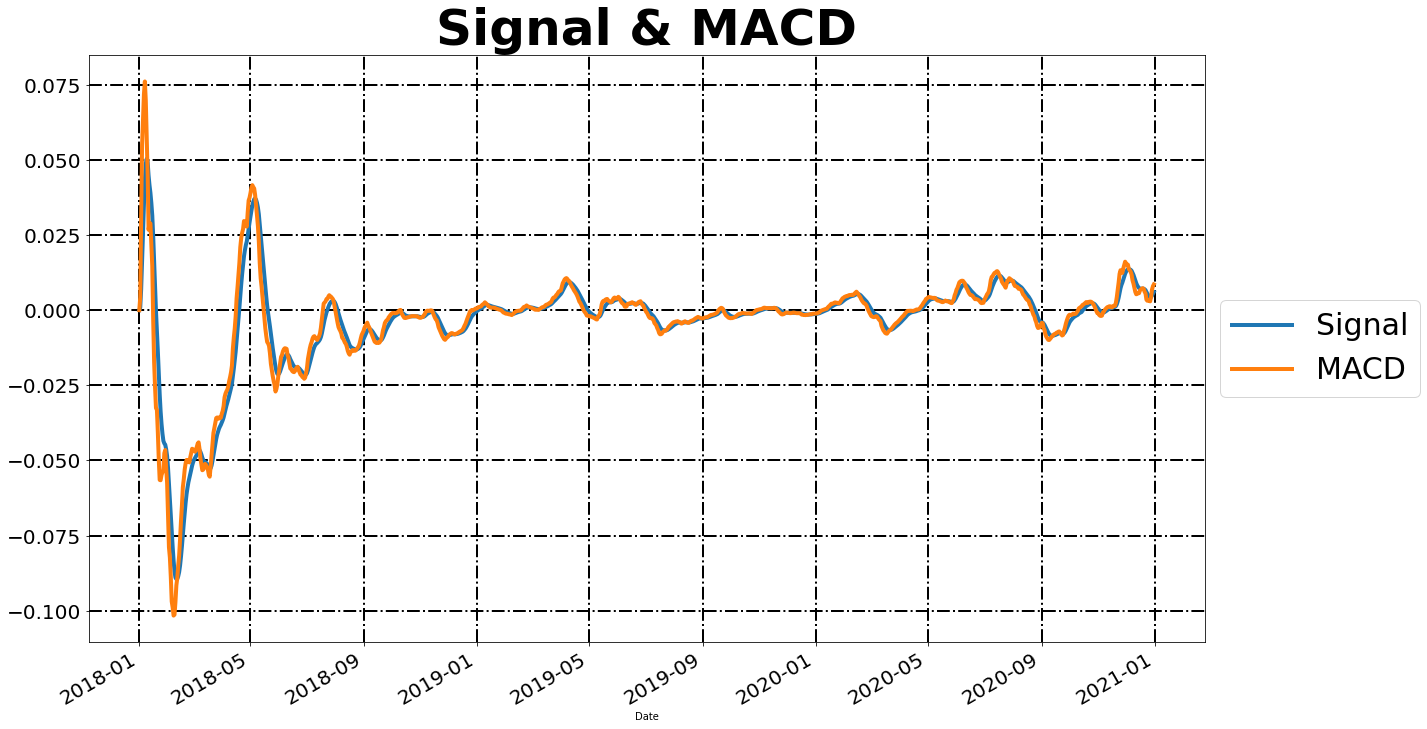

In [8]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(111)
df[['Signal','MACD']].plot(ax=ax1, lw=4.)
ax1.set_title('Signal & MACD', fontsize=50, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)

In [9]:
Buy, Sell = [], []

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.Signal.iloc[i] and df.MACD.iloc[i-1] < df.Signal.iloc[i-1]:
        Buy.append(i+2) # as we started from i = 2, we add 2 now to adjust data point
    elif df.MACD.iloc[i] < df.Signal.iloc[i] and df.MACD.iloc[i-1] > df.Signal.iloc[i-1]:
        Sell.append(i+2)

In [10]:
Buy[:5], len(Buy)

([43, 79, 153, 172, 182], 36)

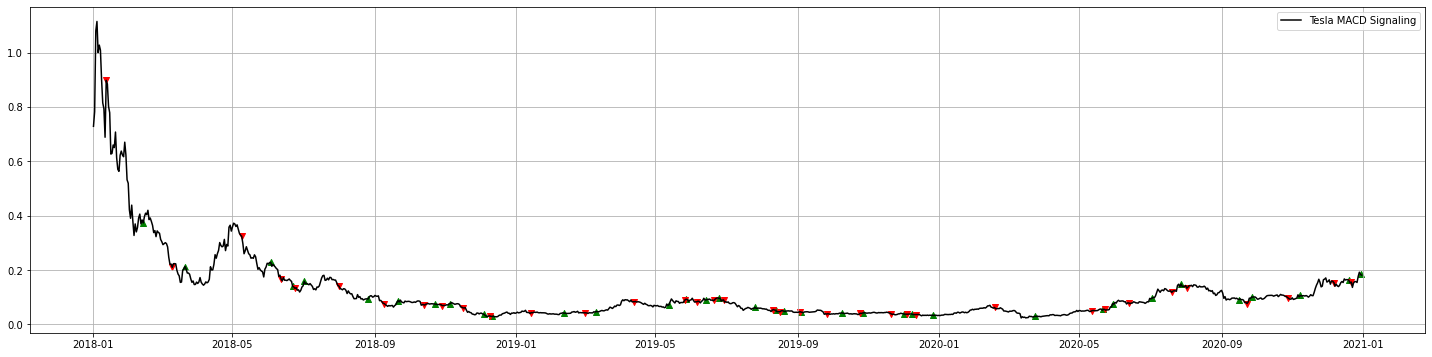

In [12]:
plt.figure(figsize=(25,6))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy][f'{stock}'], marker="^", color="green")
plt.scatter(df.iloc[Sell].index, df.iloc[Sell][f'{stock}'], marker="v", color="red")
plt.plot(df[f'{stock}'], label="Tesla MACD Signaling", color="k")
plt.grid()
plt.legend()
plt.show()
#fig = plt.figure(figsize=(20,12))
#ax1 = fig.add_subplot(111)
#df[['Signal','MACD']].plot(ax=ax1, lw=4.)
#ax1.set_title('Signal & MACD', fontsize=50, fontweight='bold')
#ax1.grid(True,color='k',linestyle='-.',linewidth=2)
#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)
#plt.xticks(size=20)
#plt.yticks(size=20)

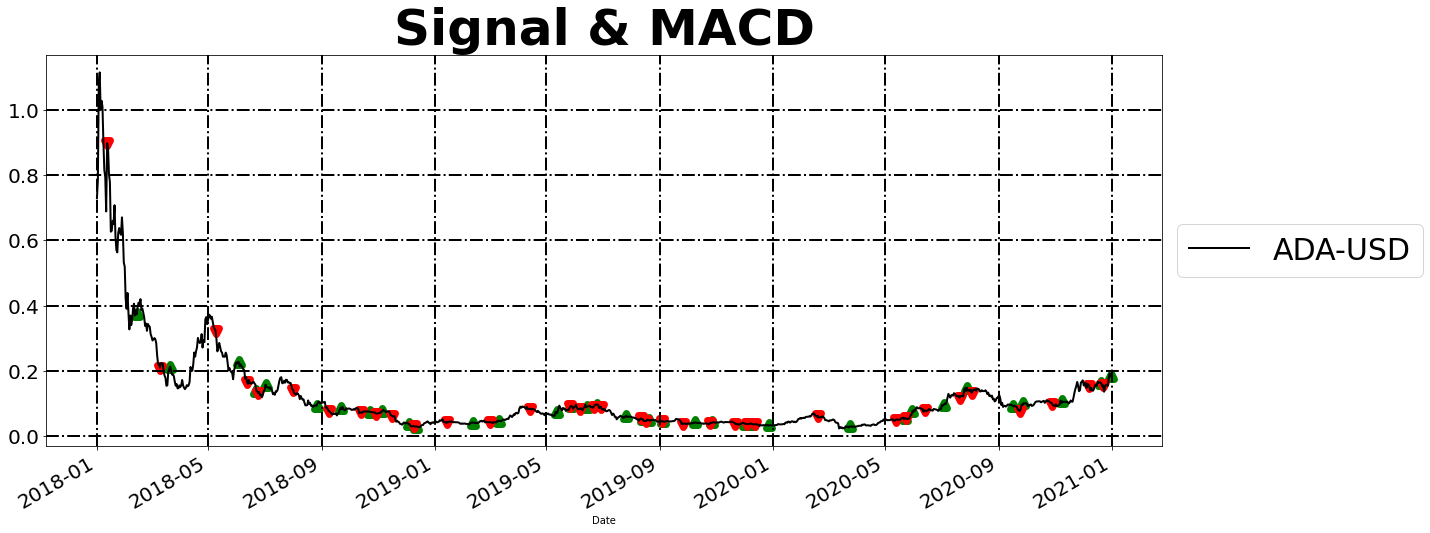

In [13]:
#plt.figure(figsize=(25,6))
#plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Tesla, marker="^", color="green")
#plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Tesla, marker="v", color="red")
#plt.plot(df.Tesla, label="Tesla MACD Signaling", color="k")
#plt.grid()
#plt.legend()
#plt.show()
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy][f'{stock}'], marker="^", color="green", lw=7.)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell][f'{stock}'], marker="v", color="red", lw=7.)
df[f'{stock}'].plot(ax=ax1,color="k", lw=2.)
ax1.set_title('Signal & MACD', fontsize=50, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [15]:
# Drop un-ended operations
RealBuys = [i+1 for i in Buy]
RealSells = [i+1 for i in Sell]

buy_prices = df[f'{stock}'].iloc[RealBuys]
sell_prices = df[f'{stock}'].iloc[RealSells]



In [16]:
if sell_prices.index[0] < buy_prices.index[0]:
    sell_prices = sell_prices.drop(sell_prices.index[0])
elif buy_prices.index[-1] > sell_prices.index[-1]:
    buy_prices = buy_prices.drop(buy_prices.index[-1])

In [17]:
profits = []

for i in range(len(sell_prices)):
    profits.append(sell_prices[i] - buy_prices[i])

In [11]:
print('total profits are {}'.format(sum(profits)))
print('Average per operation {}'.format(sum(profits)/len(profits)))

total profits are 287.5579833984375
Average per operation 9.915792530980603


In [18]:
min(profits),max(profits)

(-0.17340998351573944, 0.09360800683498383)